In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
upload = files.upload()

#데이터 불러오기
#train_dataset1=pd.read_csv('merged_data.csv')

In [ ]:
#타 에디터 이용시 아래 코드로 대체
#uploaded = pd.read_csv('human_activity/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])
features = pd.read_csv('merged_claim_data.csv', sep = ',', encoding = 'utf-8', error_bad_lines=False, engine = 'python', header = None)
features = features.rename(columns=features.iloc[0])

features = features.drop(features.index[0])#첫 row는 컬럼명이 들어간 더미데이터이므로 삭제
features = features.astype('float')

#학습 및 테스트용 데이터를 데이터 프레임으로 로딩
x = features[['TOTALPREM', 'MINCRDT', 'JPBASE_HSHD_INCM', 'RESL_CD1', 'CAUS_CODE', 'DMND_RESN_CODE', 'CHME_LICE_NO', 'DMND_AMT', 'PAYM_AMT', 'NON_PAY_RATIO', 'HEED_HOSP_YN', 'CLAIM_CNT', 'TOTAL_VLID_HOSP_OTDA', 'HOSP_VARIES', 'HOSP_DVSN_VARIES', 'CHME_LICE_COUNT']]
y = features['SIU_CUST_YN']

x = sm.add_constant(x, has_constant = 'add')

#다중 회귀모델 작성
mm = sm.OLS(y, x)
fitted_mm = mm.fit()

#분석 요약본
fitted_mm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            SIU_CUST_YN   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     300.4
Date:                Fri, 13 Aug 2021   Prob (F-statistic):               0.00
Time:                        08:49:27   Log-Likelihood:                -1026.1
No. Observations:               14677   AIC:                             2086.
Df Residuals:                   14660   BIC:                             2215.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1490      0.047     -3.190      0.001      -0.241      -0.057
TOTALPREM                0.0005      0.000      1.034      0.301      -0.000       0.001
MINCRDT                  0.0107      0.002      7.090      0.000       0.008       0.014
JPBASE_HSHD_INCM      7.389e-07   8.35e-07      0.885      0.376   -8.98e-07    2.38e-06
RESL_CD1                -0.0023      0.002     -1.042      0.297      -0.007       0.002
CAUS_CODE                0.0036      0.002      2.117      0.034       0.000       0.007
DMND_RESN_CODE          -0.0157      0.002    -10.458      0.000      -0.019      -0.013
CHME_LICE_NO         -2.653e-10   1.94e-10     -1.368      0.171   -6.45e-10    1.15e-10
DMND_AMT             -2.094e-09   1.29e-08     -0.162      0.871   -2.74e-08    2.32e-08
PAYM_AMT              4.316e-09    1.3e-08      0.332      0.740   -2.12e-08    2.98e-08
NON_PAY_RATIO           -0.0362      0.007     -4.823      0.000      -0.051      -0.021
HEED_HOSP_YN             0.0353      0.015      2.336      0.020       0.006       0.065
CLAIM_CNT               -0.0097      0.001    -12.482      0.000      -0.011      -0.008
TOTAL_VLID_HOSP_OTDA     0.0010   3.67e-05     26.424      0.000       0.001       0.001
HOSP_VARIES              0.0078      0.003      2.501      0.012       0.002       0.014
HOSP_DVSN_VARIES         0.0257      0.004      6.735      0.000       0.018       0.033
CHME_LICE_COUNT          0.0243      0.003      9.220      0.000       0.019       0.030
==============================================================================
Omnibus:                     6561.443   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32726.673
Skew:                           2.167   Prob(JB):                         0.00
Kurtosis:                       8.894   Cond. No.                     2.44e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

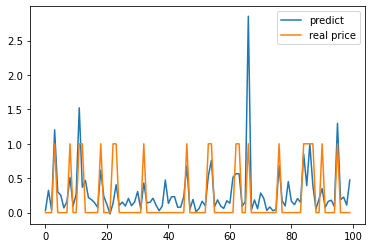

In [ ]:
plt.plot(mlr.predict(x[:100]), label="predict")
plt.plot(y[:100].values.reshape(-1, 1), label="real price")
plt.legend()

In [ ]:
#p value는 귀무가설을 기각할 지에 대한 기준이 되는 수치이다. 
#그 값이 작을수록 그 정도가 약하다고 보며, 특정 값 (대개 0.05나 0.01 등) 보다 작을 경우 귀무가설을 기각한다.